In [1]:
%load_ext autotime

time: 313 µs (started: 2022-01-02 17:08:28 +01:00)


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from bs4 import BeautifulSoup
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
from sklearn.metrics import confusion_matrix
warnings.simplefilter(action='ignore', category=Warning)
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import hamming_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.tokenize import ToktokTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
from sklearn.decomposition import TruncatedSVD
from lightgbm import LGBMClassifier
from sklearn.svm import LinearSVC
from datetime import datetime


time: 11 s (started: 2022-01-02 17:08:28 +01:00)


# 1 - Import data

In [3]:
lst = []
for i in range (1,11):
#for i in range (1,3):
    path = 'Data/Query_'+ str(i) + '.csv'
    mDf = pd.read_csv(path, dtype=str) 
    lst.append(mDf)

time: 16.2 s (started: 2022-01-02 17:08:39 +01:00)


In [4]:
mDataBrut  = pd.concat(lst, ignore_index=True)
mDataBrut

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,100001,1,NaN,NaN,2008-09-19 06:10:16,NaN,5,6715,<p>This question intends to be technology-agno...,18552,...,NaN,2009-02-27 00:27:14,MVC or event-driven component-oriented web fra...,<web-frameworks>,6,0,1,2012-08-15 13:39:14,NaN,CC BY-SA 2.5
1,100003,1,100146,NaN,2008-09-19 06:10:46,NaN,6435,939655,"<p>In Python, what are metaclasses and what do...",9951,...,2021-01-13 03:43:24,2021-10-03 16:06:40,What are metaclasses in Python?,<python><oop><metaclass><python-class><python-...,24,0,4115,NaN,NaN,CC BY-SA 4.0
2,100004,2,NaN,99830,2008-09-19 06:11:42,NaN,5,NaN,"<p>Yes, that's actually very annoying. We use...",14860,...,NaN,2008-09-19 06:11:42,NaN,NaN,NaN,0,NaN,NaN,NaN,CC BY-SA 2.5
3,100007,1,100961,NaN,2008-09-19 06:12:37,NaN,2,1899,<p>When logging with Log4Net it's very easy to...,11908,...,2014-12-04 10:01:14,2014-12-04 10:01:14,Logging Application Block - Logging the caller,<c#><logging><enterprise-library><application-...,2,0,NaN,NaN,NaN,CC BY-SA 3.0
4,100008,2,NaN,99743,2008-09-19 06:12:48,NaN,0,NaN,"<p>I use <a href=""http://devguard.com/"" rel=""n...",16549,...,NaN,2008-09-19 06:12:48,NaN,NaN,NaN,0,NaN,NaN,NaN,CC BY-SA 2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,69847370,2,NaN,69846609,2021-11-05 00:28:43,NaN,2,NaN,<p>You can use <code>tf.gather</code> with the...,17289463,...,NaN,2021-11-05 00:28:43,NaN,NaN,NaN,1,NaN,NaN,NaN,CC BY-SA 4.0
499996,69850769,2,NaN,69849359,2021-11-05 09:04:35,NaN,0,NaN,"<pre><code>std::vector&lt;T&gt; v(100, t);\nf(...",2684539,...,NaN,2021-11-05 09:04:35,NaN,NaN,NaN,0,NaN,NaN,NaN,CC BY-SA 4.0
499997,69850770,2,NaN,69849405,2021-11-05 09:04:36,NaN,0,NaN,<p>I was able to solve it by changing the arro...,14212342,...,2021-11-05 10:38:44,2021-11-05 10:38:44,NaN,NaN,NaN,1,NaN,NaN,NaN,CC BY-SA 4.0
499998,69850771,2,NaN,69828586,2021-11-05 09:04:39,NaN,0,NaN,"<p>After some traces, I did some changes and i...",6587821,...,2021-11-05 09:15:51,2021-11-05 09:15:51,NaN,NaN,NaN,0,NaN,NaN,NaN,CC BY-SA 4.0


time: 1.1 s (started: 2022-01-02 17:08:56 +01:00)


## 1.1 - Select Col

In [5]:
mDataBrut_1 = mDataBrut[['Tags', 'Body', 'Title', 'Score']]
mDataBrut_1.shape

(500000, 4)

time: 48.3 ms (started: 2022-01-02 17:08:57 +01:00)


In [6]:
mDataBrut_2 = mDataBrut_1.copy()
mDataBrut_2 = mDataBrut_2.dropna()
mDataBrut_2.shape

(129665, 4)

time: 378 ms (started: 2022-01-02 17:08:57 +01:00)


In [7]:
mDataBrut_3 = mDataBrut_2.copy()
mDataBrut_3.Score = mDataBrut_3.Score.astype(int)
mDataBrut_3 =  mDataBrut_3[mDataBrut_3['Score']>5]
mDataBrut_3.shape

(38902, 4)

time: 345 ms (started: 2022-01-02 17:08:57 +01:00)


In [8]:
mDataBrut_4 = mDataBrut_3.copy()
mDataBrut_4.pop('Score')
mDataBrut_4

,Tags,Body,Title
1,<python><oop><metaclass><python-class><python-...,"<p>In Python, what are metaclasses and what do...",What are metaclasses in Python?
22,<c#><regex>,<p>What is a good regular expression that can ...,Regular expressions in C# for file name valida...
25,<algorithm><sorting><lisp><list>,<p>I have two unsorted lists and I need to pro...,"I need to join two lists, sort them and remove..."
32,<testing><browser><user-interface>,<p>Tools like Selenium are good for testing us...,How do you test your web UI to see if it rende...
38,<c#><linq-to-sql>,<p>I'd like to know if there's an easier way t...,LINQ to SQL insert-if-non-existent
...,...,...,...
488894,<mysql><perl><mariadb><dbi>,<p>My company has a Perl application in server...,Perl How to change account host using DBI module?
492219,<typescript><language-design>,<p>Why does the TypeScript compiler compile it...,Why does the TypeScript compiler compile its o...
492437,<kotlin><mockk>,<p>When using Mockk to spy a Kotlin or Java cl...,Mockk spied class with anonymous class field r...
495331,<raku><cro>,<p>I'm hoping to try out the Cro library in Ra...,"Difficulties installing Cro: ""Failed to find d..."


time: 17.5 ms (started: 2022-01-02 17:08:58 +01:00)


In [9]:
mDf = mDataBrut_4.copy()
mDf = mDf[mDf['Tags'].notna()]
mDf = mDf[mDf['Title'].notna()]
mDf = mDf.rename(columns={'Body': "Txt"})
mDf['Body'] = mDf["Txt"] + mDf["Title"]
mDf

,Tags,Txt,Title,Body
1,<python><oop><metaclass><python-class><python-...,"<p>In Python, what are metaclasses and what do...",What are metaclasses in Python?,"<p>In Python, what are metaclasses and what do..."
22,<c#><regex>,<p>What is a good regular expression that can ...,Regular expressions in C# for file name valida...,<p>What is a good regular expression that can ...
25,<algorithm><sorting><lisp><list>,<p>I have two unsorted lists and I need to pro...,"I need to join two lists, sort them and remove...",<p>I have two unsorted lists and I need to pro...
32,<testing><browser><user-interface>,<p>Tools like Selenium are good for testing us...,How do you test your web UI to see if it rende...,<p>Tools like Selenium are good for testing us...
38,<c#><linq-to-sql>,<p>I'd like to know if there's an easier way t...,LINQ to SQL insert-if-non-existent,<p>I'd like to know if there's an easier way t...
...,...,...,...,...
488894,<mysql><perl><mariadb><dbi>,<p>My company has a Perl application in server...,Perl How to change account host using DBI module?,<p>My company has a Perl application in server...
492219,<typescript><language-design>,<p>Why does the TypeScript compiler compile it...,Why does the TypeScript compiler compile its o...,<p>Why does the TypeScript compiler compile it...
492437,<kotlin><mockk>,<p>When using Mockk to spy a Kotlin or Java cl...,Mockk spied class with anonymous class field r...,<p>When using Mockk to spy a Kotlin or Java cl...
495331,<raku><cro>,<p>I'm hoping to try out the Cro library in Ra...,"Difficulties installing Cro: ""Failed to find d...",<p>I'm hoping to try out the Cro library in Ra...


time: 94.4 ms (started: 2022-01-02 17:08:58 +01:00)


In [10]:
mDf_Body = pd.DataFrame(mDf['Body'])
mDf_Tags = pd.DataFrame(mDf['Tags'])

time: 5.23 ms (started: 2022-01-02 17:08:58 +01:00)


# 2 - Cleaning 

## 2.1 Body
#### 2.1.1 HTML -> String / 2.1.2 Minus / 2.1.3 - Caract pb / 2.1.4 - Chiffre /  2.1.5 - Ponct / 2.1.6 - Lem /  2.1.7 -StopWord


In [11]:
mDf_Body['string_in_HTML']=mDf_Body.apply(lambda x: BeautifulSoup(x['Body']).get_text().replace('\n',' '),axis=1)
mDf_Body = pd.DataFrame(mDf_Body['string_in_HTML'])
mDf_Body.head(2)

,string_in_HTML
1,"In Python, what are metaclasses and what do we..."
22,What is a good regular expression that can val...


time: 30.3 s (started: 2022-01-02 17:08:58 +01:00)


In [12]:
import pandas as pd
import numpy as np
import string

import sys
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

def data_preprocess(dataframe,xXx, lower=True, ascii_chars=True, no_numbers=True, no_punctuation=True, remove_stopwords=True, lemmatize=True, custom_blank_text='non ascii symbols punctuations numbers'):
    # Minuscule
    if lower == True:
        dataframe['Query_Modified'] = dataframe[xXx].str.lower()
    
    # Caractere non viable
    if ascii_chars == True:                            
        dataframe["Query_Modified"] = dataframe["Query_Modified"].apply(lambda x: ''.join([" " if i not in string.printable else i for i in x]))
    
    # Retire chiffre
    if no_numbers == True:
        dataframe['Query_Modified'] = dataframe['Query_Modified'].str.replace(r'\d', '')
    
    #Ponctuation
    if no_punctuation == True:
        dataframe['Query_Modified'] = dataframe['Query_Modified'].str.replace(r'[^\w\s]+', ' ')
    
    # Retire Stopwords
    if remove_stopwords == True:
        stop = stopwords.words('english')
        
        dataframe['Query_Modified'] = dataframe['Query_Modified'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    
    #Lemmatize
    if lemmatize == True:
        wnl = WordNetLemmatizer()
        def lemmatize_all(sentence):
            text = list()
            for word, tag in nltk.pos_tag(str.split(sentence)):
                if tag.startswith("NN"):
                    text.append( wnl.lemmatize(word, pos='n'))
                elif tag.startswith('VB'):
                    text.append( wnl.lemmatize(word, pos='v'))
                elif tag.startswith('JJ'):
                    text.append( wnl.lemmatize(word, pos='a'))
                else:
                    text.append( word)
            return ' '.join(text)            

        dataframe['Query_Modified'] = dataframe['Query_Modified'].apply(lambda sentence: ' '.join([lemmatize_all(sentence)]))
    
    #Replacing blanks from ascii characters, punctuations and numbers with custom text
    dataframe['Query_Modified'].replace(r'^\s*$', custom_blank_text, regex=True, inplace = True)
    
    #Extra Spaces
    dataframe['Query_Modified'] = dataframe['Query_Modified'].apply(lambda x: re.sub("\s\s+", " ", str(x.strip())))
    
    print('Done')
    
    return dataframe


time: 2.76 ms (started: 2022-01-02 17:09:28 +01:00)


In [13]:
data = data_preprocess(mDf_Body, 'string_in_HTML', lower=True, ascii_chars=True, no_numbers=True, no_punctuation=True, remove_stopwords=True, lemmatize=False, custom_blank_text='non ascii symbols punctuations numbers')
data

Done


,string_in_HTML,Query_Modified
1,"In Python, what are metaclasses and what do we...",python metaclasses use metaclasses python
22,What is a good regular expression that can val...,good regular expression validate text string m...
25,I have two unsorted lists and I need to produc...,two unsorted lists need produce another list s...
32,Tools like Selenium are good for testing user ...,tools like selenium good testing user interact...
38,I'd like to know if there's an easier way to i...,like know easier way insert record already exi...
...,...,...
488894,My company has a Perl application in server wi...,company perl application server ip new rule im...
492219,Why does the TypeScript compiler compile its o...,typescript compiler compile optional chaining ...
492437,When using Mockk to spy a Kotlin or Java class...,using mockk spy kotlin java class class field ...
495331,I'm hoping to try out the Cro library in Raku:...,hoping try cro library raku https cro services...


time: 19.2 s (started: 2022-01-02 17:09:28 +01:00)


In [14]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub(r"\'\n", " ", text)
    text = re.sub(r"\'\xa0", " ", text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

time: 6.3 ms (started: 2022-01-02 17:09:47 +01:00)


In [15]:
data['Body'] = data['Query_Modified'].apply(lambda x: clean_text(x)) 
data

,string_in_HTML,Query_Modified,Body
1,"In Python, what are metaclasses and what do we...",python metaclasses use metaclasses python,python metaclasses use metaclasses python
22,What is a good regular expression that can val...,good regular expression validate text string m...,good regular expression validate text string m...
25,I have two unsorted lists and I need to produc...,two unsorted lists need produce another list s...,two unsorted lists need produce another list s...
32,Tools like Selenium are good for testing user ...,tools like selenium good testing user interact...,tools like selenium good testing user interact...
38,I'd like to know if there's an easier way to i...,like know easier way insert record already exi...,like know easier way insert record already exi...
...,...,...,...
488894,My company has a Perl application in server wi...,company perl application server ip new rule im...,company perl application server ip new rule im...
492219,Why does the TypeScript compiler compile its o...,typescript compiler compile optional chaining ...,typescript compiler compile optional chaining ...
492437,When using Mockk to spy a Kotlin or Java class...,using mockk spy kotlin java class class field ...,using mockk spy kotlin java class class field ...
495331,I'm hoping to try out the Cro library in Raku:...,hoping try cro library raku https cro services...,hoping try cro library raku https cro services...


time: 5 s (started: 2022-01-02 17:09:47 +01:00)


In [16]:
token=ToktokTokenizer()
punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~'

def strip_list_noempty(mylist):
    newlist = (item.strip() if hasattr(item, 'strip') else item for item in mylist)
    return [item for item in newlist if item != '']


def clean_punct(text): 
    words=token.tokenize(text)
    punctuation_filtered = []
    regex = re.compile('[%s]' % re.escape(punct))
    remove_punctuation = str.maketrans(' ', ' ', punct)
    for w in words:
        punctuation_filtered.append(regex.sub('', w))
  
    filtered_list = strip_list_noempty(punctuation_filtered)
        
    return ' '.join(map(str, filtered_list))

time: 1.93 ms (started: 2022-01-02 17:09:52 +01:00)


In [17]:
data['Body'] = data['Body'].apply(lambda x: clean_punct(x)) 
data

,string_in_HTML,Query_Modified,Body
1,"In Python, what are metaclasses and what do we...",python metaclasses use metaclasses python,python metaclasses use metaclasses python
22,What is a good regular expression that can val...,good regular expression validate text string m...,good regular expression validate text string m...
25,I have two unsorted lists and I need to produc...,two unsorted lists need produce another list s...,two unsorted lists need produce another list s...
32,Tools like Selenium are good for testing user ...,tools like selenium good testing user interact...,tools like selenium good testing user interact...
38,I'd like to know if there's an easier way to i...,like know easier way insert record already exi...,like know easier way insert record already exi...
...,...,...,...
488894,My company has a Perl application in server wi...,company perl application server ip new rule im...,company perl application server ip new rule im...
492219,Why does the TypeScript compiler compile its o...,typescript compiler compile optional chaining ...,typescript compiler compile optional chaining ...
492437,When using Mockk to spy a Kotlin or Java class...,using mockk spy kotlin java class class field ...,using mockk spy kotlin java class class field ...
495331,I'm hoping to try out the Cro library in Raku:...,hoping try cro library raku https cro services...,hoping try cro library raku https cro services...


time: 12.3 s (started: 2022-01-02 17:09:53 +01:00)


In [18]:
def stopWordsRemove(text):
    stop_words = set(stopwords.words("english"))
    words=token.tokenize(text)
    filtered = [w for w in words if not w in stop_words]
    return ' '.join(map(str, filtered))

time: 860 µs (started: 2022-01-02 17:10:05 +01:00)


In [19]:
data['Body'] = data['Body'].apply(lambda x: stopWordsRemove(x)) 
data.dtypes

string_in_HTML    object
Query_Modified    object
Body              object
dtype: object

time: 16.6 s (started: 2022-01-02 17:10:05 +01:00)


In [20]:
X_new = pd.DataFrame(data['Body'])
X_new

,Body
1,python metaclasses use metaclasses python
22,good regular expression validate text string m...
25,two unsorted lists need produce another list s...
32,tools like selenium good testing user interact...
38,like know easier way insert record already exi...
...,...
488894,company perl application server ip new rule im...
492219,typescript compiler compile optional chaining ...
492437,using mockk spy kotlin java class class field ...
495331,hoping try cro library raku https cro services...


time: 20.1 ms (started: 2022-01-02 17:10:22 +01:00)


In [21]:
df_lab = pd.DataFrame(X_new['Body'])
df_lab = df_lab.T

from collections import OrderedDict

new_r = []
for i in tqdm(df_lab.columns):
    s = df_lab[i].values[0]
    t = ' '.join(OrderedDict((w,w) for w in s.split()).keys())
    new_r.append(t)
    
    
X_new = pd.DataFrame(new_r)

X_new = X_new.rename(columns={0: "Text_Clean"})
X_new

100%|███████████████████████████████████| 38902/38902 [00:04<00:00, 8312.54it/s]


,Text_Clean
0,python metaclasses use
1,good regular expression validate text string m...
2,two unsorted lists need produce another list s...
3,tools like selenium good testing user interact...
4,like know easier way insert record already exi...
...,...
38897,company perl application server ip new rule im...
38898,typescript compiler compile optional chaining ...
38899,using mockk spy kotlin java class field anonym...
38900,hoping try cro library raku https services doc...


time: 5.79 s (started: 2022-01-02 17:10:22 +01:00)


## 2.2 -  Tags
#### 2.2.1 HTML -> String / 2.2.2 Minus / 2.2.3 - Caract pb / 2.2.4 - Chiffre /  2.2.5 - Ponct / 2.2.6 - Lem /  2.2.7 -StopWord


In [22]:
mDf_Tags_1 = mDf_Tags.copy()
mDf_Tags_1['Tags'] = mDf_Tags_1['Tags'].str.replace(r'><', ' ')
mDf_Tags_1['Tags'] = mDf_Tags_1['Tags'].str.replace(r'<', '')
mDf_Tags_1['Tags'] = mDf_Tags_1['Tags'].str.replace(r'>', '')
mDf_Tags_2 = data_preprocess(mDf_Tags_1, 'Tags', lower=True, ascii_chars=True, no_numbers=True, no_punctuation=True, remove_stopwords=True, lemmatize=True, custom_blank_text='non ascii symbols punctuations numbers')
mDf_Tags_2.pop('Tags')
mDf_Tags_2= mDf_Tags_2.rename(columns={'Query_Modified': "Tags"})
mDf_Tags_2 = mDf_Tags_2.reset_index()
mDf_Tags_2.pop('index')
mDf_Tags_2.shape




Done


(38902, 1)

time: 25.5 s (started: 2022-01-02 17:10:27 +01:00)


In [23]:
df_lab = pd.DataFrame(mDf_Tags_2['Tags'])
df_lab = df_lab.T

from collections import OrderedDict

new_r = []
for i in tqdm(df_lab.columns):
    s = df_lab[i].values[0]
    t = ' '.join(OrderedDict((w,w) for w in s.split()).keys())
    new_r.append(t)
    
    
y_new = pd.DataFrame(new_r)

y_new = y_new.rename(columns={0: "Tags_Clean"})
y_new

100%|██████████████████████████████████| 38902/38902 [00:02<00:00, 16960.22it/s]


,Tags_Clean
0,python oop metaclass class datamodel
1,c regex
2,algorithm sort lisp list
3,test browser user interface
4,c linq sql
...,...
38897,mysql perl mariadb dbi
38898,typescript language design
38899,kotlin mockk
38900,raku cro


time: 3.31 s (started: 2022-01-02 17:10:53 +01:00)


## 2.3 -  Concat Body + Tags

In [24]:
result = pd.concat([X_new, y_new], axis=1, ignore_index=True)
result = result.rename(columns={0: "Txt_Clean", 1:'Tags_Clean'})
new_df = result.copy()
new_df

,Txt_Clean,Tags_Clean
0,python metaclasses use,python oop metaclass class datamodel
1,good regular expression validate text string m...,c regex
2,two unsorted lists need produce another list s...,algorithm sort lisp list
3,tools like selenium good testing user interact...,test browser user interface
4,like know easier way insert record already exi...,c linq sql
...,...,...
38897,company perl application server ip new rule im...,mysql perl mariadb dbi
38898,typescript compiler compile optional chaining ...,typescript language design
38899,using mockk spy kotlin java class field anonym...,kotlin mockk
38900,hoping try cro library raku https services doc...,raku cro


time: 30 ms (started: 2022-01-02 17:10:56 +01:00)


# 3 - Analyse Top Words

## 3.1 - Body

458 tags couvrent 50% des questions
1693 tags couvrent 75% des questions
2332 tags couvrent 80% des questions
3439 tags couvrent 85% des questions
5802 tags couvrent 90% des questions


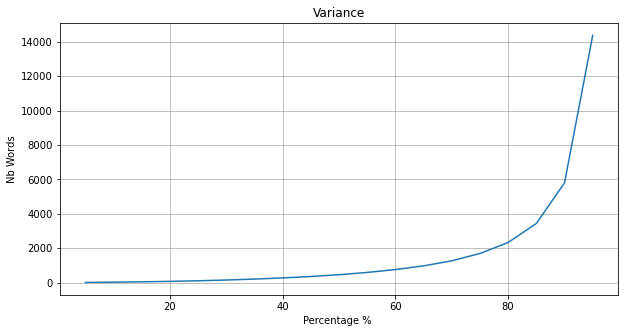

time: 2.59 s (started: 2022-01-02 17:10:56 +01:00)


In [25]:
df1 = pd.DataFrame(new_df.Txt_Clean)
df1["Txt_Count"] = df1["Txt_Clean"].apply(lambda x : len(x.split()))

txt_val = df1['Txt_Clean']
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
tag_bow = vectorizer.fit_transform(txt_val)
tags = vectorizer.get_feature_names()
freq = tag_bow.sum(axis=0).A1
tag_to_count_map = dict(zip(tags, freq))

list = []
for key, value in tag_to_count_map.items():
    list.append([key, value]) 
    
tag_df = pd.DataFrame(list, columns=['Tags', 'Counts'])
tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False)
tag_df_sorted

tag_df_sorted_1 = tag_df_sorted.copy()
_sum_ = tag_df_sorted_1['Counts'].sum()
tag_df_sorted_1['_sum_'] = _sum_
tag_df_sorted_1['Perc'] = tag_df_sorted_1['Counts'] / tag_df_sorted_1['_sum_']*100
tag_df_sorted_1['Perc_cumsum'] = tag_df_sorted_1['Perc'].cumsum()
tag_df_sorted_1 = tag_df_sorted_1.reset_index()
tag_df_sorted_1.pop('index')

tag_df_sorted_05 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 5]
tag_df_sorted_10 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 10]
tag_df_sorted_15 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 15]
tag_df_sorted_20 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 20]
tag_df_sorted_25 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 25]
tag_df_sorted_30 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 30]
tag_df_sorted_35 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 35]
tag_df_sorted_40 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 40]
tag_df_sorted_45 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 45]
tag_df_sorted_50 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 50]
tag_df_sorted_55 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 55]
tag_df_sorted_60 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 60]
tag_df_sorted_65 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 65]
tag_df_sorted_70 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 70]
tag_df_sorted_75 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 75]
tag_df_sorted_80 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 80]
tag_df_sorted_85 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 85]
tag_df_sorted_90 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 90]
tag_df_sorted_95 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 95]

lst = [[5,  tag_df_sorted_05.shape[0]],
[10, tag_df_sorted_10.shape[0]],
[15, tag_df_sorted_15.shape[0]],
[20, tag_df_sorted_20.shape[0]],
[25, tag_df_sorted_25.shape[0]],
[30, tag_df_sorted_30.shape[0]],
[35, tag_df_sorted_35.shape[0]],
[40, tag_df_sorted_40.shape[0]],
[45, tag_df_sorted_45.shape[0]],
[50, tag_df_sorted_50.shape[0]],
[55, tag_df_sorted_55.shape[0]],
[60, tag_df_sorted_60.shape[0]],
[65, tag_df_sorted_65.shape[0]],
[70, tag_df_sorted_70.shape[0]],
[75, tag_df_sorted_75.shape[0]],
[80, tag_df_sorted_80.shape[0]],
[85, tag_df_sorted_85.shape[0]],
[90, tag_df_sorted_90.shape[0]],
[95, tag_df_sorted_95.shape[0]]]
       
lst_df_ = pd.DataFrame(lst)
lst_df_ = lst_df_.rename(columns={0: "perc", 1: "nb_tags"})
lst_df_ = lst_df_.set_index('perc')

plt.figure(figsize=(10, 5))
plt.plot(lst_df_)
plt.grid()
plt.title("Variance")
plt.xlabel("Percentage % ")
plt.ylabel("Nb Words")

_50_most_important = tag_df_sorted_50.shape[0]
_75_most_important = tag_df_sorted_75.shape[0]
_80_most_important = tag_df_sorted_80.shape[0]
_85_most_important = tag_df_sorted_85.shape[0]
_90_most_important = tag_df_sorted_90.shape[0]

print(_50_most_important, "tags couvrent 50% des questions")
print(_75_most_important, "tags couvrent 75% des questions")
print(_80_most_important, "tags couvrent 80% des questions")
print(_85_most_important, "tags couvrent 85% des questions")
print(_90_most_important, "tags couvrent 90% des questions")

## 3.2 - Tags

82 tags couvrent 50% des questions
373 tags couvrent 75% des questions
517 tags couvrent 80% des questions
742 tags couvrent 85% des questions
1144 tags couvrent 90% des questions


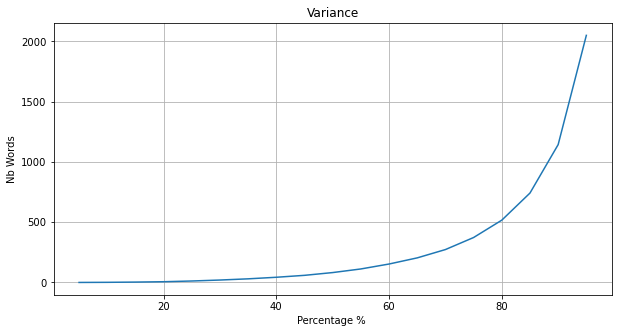

time: 482 ms (started: 2022-01-02 17:10:59 +01:00)


In [26]:
df1 = pd.DataFrame(new_df.Tags_Clean)
df1["Tags_Count"] = df1["Tags_Clean"].apply(lambda x : len(x.split()))

txt_val = df1['Tags_Clean']
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
tag_bow = vectorizer.fit_transform(txt_val)
tags = vectorizer.get_feature_names()
freq = tag_bow.sum(axis=0).A1
tag_to_count_map = dict(zip(tags, freq))

list = []
for key, value in tag_to_count_map.items():
    list.append([key, value]) 
    
tag_df = pd.DataFrame(list, columns=['Tags', 'Counts'])
tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False)
tag_df_sorted

tag_df_sorted_1 = tag_df_sorted.copy()
_sum_ = tag_df_sorted_1['Counts'].sum()
tag_df_sorted_1['_sum_'] = _sum_
tag_df_sorted_1['Perc'] = tag_df_sorted_1['Counts'] / tag_df_sorted_1['_sum_']*100
tag_df_sorted_1['Perc_cumsum'] = tag_df_sorted_1['Perc'].cumsum()
tag_df_sorted_1 = tag_df_sorted_1.reset_index()
tag_df_sorted_1.pop('index')

tag_df_sorted_05 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 5]
tag_df_sorted_10 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 10]
tag_df_sorted_15 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 15]
tag_df_sorted_20 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 20]
tag_df_sorted_25 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 25]
tag_df_sorted_30 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 30]
tag_df_sorted_35 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 35]
tag_df_sorted_40 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 40]
tag_df_sorted_45 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 45]
tag_df_sorted_50 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 50]
tag_df_sorted_55 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 55]
tag_df_sorted_60 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 60]
tag_df_sorted_65 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 65]
tag_df_sorted_70 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 70]
tag_df_sorted_75 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 75]
tag_df_sorted_80 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 80]
tag_df_sorted_85 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 85]
tag_df_sorted_90 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 90]
tag_df_sorted_95 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 95]

lst = [[5,  tag_df_sorted_05.shape[0]],
[10, tag_df_sorted_10.shape[0]],
[15, tag_df_sorted_15.shape[0]],
[20, tag_df_sorted_20.shape[0]],
[25, tag_df_sorted_25.shape[0]],
[30, tag_df_sorted_30.shape[0]],
[35, tag_df_sorted_35.shape[0]],
[40, tag_df_sorted_40.shape[0]],
[45, tag_df_sorted_45.shape[0]],
[50, tag_df_sorted_50.shape[0]],
[55, tag_df_sorted_55.shape[0]],
[60, tag_df_sorted_60.shape[0]],
[65, tag_df_sorted_65.shape[0]],
[70, tag_df_sorted_70.shape[0]],
[75, tag_df_sorted_75.shape[0]],
[80, tag_df_sorted_80.shape[0]],
[85, tag_df_sorted_85.shape[0]],
[90, tag_df_sorted_90.shape[0]],
[95, tag_df_sorted_95.shape[0]]]
       
lst_df_ = pd.DataFrame(lst)
lst_df_ = lst_df_.rename(columns={0: "perc", 1: "nb_tags"})
lst_df_ = lst_df_.set_index('perc')

plt.figure(figsize=(10, 5))
plt.plot(lst_df_)
plt.grid()
plt.title("Variance")
plt.xlabel("Percentage % ")
plt.ylabel("Nb Words")

_50_most_important = tag_df_sorted_50.shape[0]
_75_most_important = tag_df_sorted_75.shape[0]
_80_most_important = tag_df_sorted_80.shape[0]
_85_most_important = tag_df_sorted_85.shape[0]
_90_most_important = tag_df_sorted_90.shape[0]

print(_50_most_important, "tags couvrent 50% des questions")
print(_75_most_important, "tags couvrent 75% des questions")
print(_80_most_important, "tags couvrent 80% des questions")
print(_85_most_important, "tags couvrent 85% des questions")
print(_90_most_important, "tags couvrent 90% des questions")

# ----

In [27]:
new_df

,Txt_Clean,Tags_Clean
0,python metaclasses use,python oop metaclass class datamodel
1,good regular expression validate text string m...,c regex
2,two unsorted lists need produce another list s...,algorithm sort lisp list
3,tools like selenium good testing user interact...,test browser user interface
4,like know easier way insert record already exi...,c linq sql
...,...,...
38897,company perl application server ip new rule im...,mysql perl mariadb dbi
38898,typescript compiler compile optional chaining ...,typescript language design
38899,using mockk spy kotlin java class field anonym...,kotlin mockk
38900,hoping try cro library raku https services doc...,raku cro


time: 32 ms (started: 2022-01-02 17:10:59 +01:00)


# 4 - Vectorize

## 4.1 - Tags

In [28]:
y_feat = 100
vectorizer = CountVectorizer(max_features=y_feat)
y = pd.DataFrame(vectorizer.fit_transform(new_df.Tags_Clean).toarray(), columns=vectorizer.get_feature_names())
print(y.shape)

(38902, 100)
time: 335 ms (started: 2022-01-02 17:10:59 +01:00)


In [29]:
y["sum"] = y.sum(axis=1)
mask = y[y["sum"] < 1]
y = y[y["sum"] >= 1]
y.pop('sum')
y

,agnostic,ajax,algorithm,apache,application,array,asp,bash,browser,build,...,version,vim,visual,wcf,web,winapi,window,winforms,wpf,xml
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


time: 158 ms (started: 2022-01-02 17:11:00 +01:00)


In [30]:
mask = mask.reset_index()
mask

,index,agnostic,ajax,algorithm,apache,application,array,asp,bash,browser,...,vim,visual,wcf,web,winapi,window,winforms,wpf,xml,sum
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,52,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,85,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6354,38887,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6355,38888,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6356,38892,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6357,38899,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


time: 28.9 ms (started: 2022-01-02 17:11:00 +01:00)


time: 969 µs (started: 2022-01-02 17:11:00 +01:00)


## 4.2 - Body

In [32]:
x_feat = 3439
vetorizar = TfidfVectorizer(max_features=x_feat) 
X = pd.DataFrame(vetorizar.fit_transform(new_df.Txt_Clean).toarray())
print(X.shape)

(38902, 3439)
time: 3.12 s (started: 2022-01-02 17:11:00 +01:00)


In [33]:
X = X.drop(mask)
 
X

,0,1,2,3,4,5,6,7,8,9,...,3429,3430,3431,3432,3433,3434,3435,3436,3437,3438
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.118286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


time: 1.85 s (started: 2022-01-02 17:11:03 +01:00)


In [34]:
print(X.shape)
print(y.shape)

(32543, 3439)
(32543, 100)
time: 1.26 ms (started: 2022-01-02 17:11:05 +01:00)


# 5 - Reduction dimension body W/ TruncatedSVD

In [35]:
i = 1000
print('X before TruncatedSVD', X.shape)
svd = TruncatedSVD(n_components=i, random_state=42)
X_svd = svd.fit_transform(X)
print('X after TruncatedSVD', X_svd.shape)

X before TruncatedSVD (32543, 3439)
X after TruncatedSVD (32543, 1000)
time: 1min 16s (started: 2022-01-02 17:11:05 +01:00)


In [36]:
def avg_jacard(y_true,y_pred):
    jacard = np.minimum(y_true,y_pred).sum(axis=1) / np.maximum(y_true,y_pred).sum(axis=1)    
    return jacard.mean()*100

    
def print_score(y_pred, y_test):
    print("Accuracy :",metrics.accuracy_score(y_test,y_pred))
    print("Macro f1 score :",metrics.f1_score(y_test, y_pred, average = 'macro'))
    print("Micro f1 score :",metrics.f1_score(y_test, y_pred, average = 'micro'))
    print("Jacard score: {}".format(avg_jacard(y_test, y_pred)))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
    print("---")

time: 1.24 ms (started: 2022-01-02 17:12:21 +01:00)


In [37]:
X_svd_df = pd.DataFrame(X_svd)

print('X_svd_df : ', X_svd_df.shape)
print('y :', y.shape)

X_train =  X_svd_df.iloc[0:10000]
X_test =  X_svd_df.iloc[10000:20000]
y_train = y.iloc[0:10000]
y_test = y.iloc[10000:20000]


print('X_train :', X_train.shape)
print('X_test :', X_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

X_svd_df :  (32543, 1000)
y : (32543, 100)
X_train : (10000, 1000)
X_test : (10000, 1000)
y_train : (10000, 100)
y_test : (10000, 100)
time: 5.49 ms (started: 2022-01-02 17:12:21 +01:00)


# Test - RNN

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Embedding, Flatten, GlobalMaxPool1D, Dropout, Conv1D
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam

time: 890 µs (started: 2022-01-02 17:32:54 +01:00)


In [68]:
from tensorflow.keras import backend as K
def jaccard_distance(y_true, y_pred, smooth=100):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    sum_ = K.sum(K.abs(y_true) + K.abs(y_pred), axis=-1)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return (1 - jac) * smooth

time: 890 µs (started: 2022-01-02 17:35:28 +01:00)


In [80]:
input_dim = X_train.shape[1]
output_dim = y_train.shape[1]
print(input_dim)
print(output_dim)

1000
100
time: 1.34 ms (started: 2022-01-02 17:45:28 +01:00)


In [76]:
hidden_neurons = 150
input_dim = X_train.shape[1]
output_dim = y_train.shape[1]

model_2 = Sequential()
model_2.add(Dense(hidden_neurons,input_dim=input_dim,activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(hidden_neurons,input_dim=input_dim,activation='relu'))
model_2.add(Dropout(0.1))
model_2.add(Dense(output_dim,activation='sigmoid'))

# Compile model
model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=["accuracy"])
model_2.summary()

history = model_2.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.33,
                    callbacks=callbacks)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 150)               150150    
_________________________________________________________________
dropout_15 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_16 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 100)               15100     
Total params: 187,900
Trainable params: 187,900
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
282/282 [==============================] - 2s 4ms/step - loss: 0.3042 - accuracy: 0.0517 - val_loss: 0

In [75]:
history = model_2.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.1,
                    callbacks=callbacks)

Epoch 1/20
282/282 [==============================] - 2s 4ms/step - loss: 0.2949 - accuracy: 0.0504 - val_loss: 0.0878 - val_accuracy: 0.0890
Epoch 2/20
282/282 [==============================] - 1s 4ms/step - loss: 0.0884 - accuracy: 0.0863 - val_loss: 0.0834 - val_accuracy: 0.1010
Epoch 3/20
282/282 [==============================] - 1s 4ms/step - loss: 0.0798 - accuracy: 0.1524 - val_loss: 0.0699 - val_accuracy: 0.2130
Epoch 4/20
282/282 [==============================] - 1s 4ms/step - loss: 0.0674 - accuracy: 0.2261 - val_loss: 0.0620 - val_accuracy: 0.2380
Epoch 5/20
282/282 [==============================] - 1s 4ms/step - loss: 0.0598 - accuracy: 0.2666 - val_loss: 0.0567 - val_accuracy: 0.2630
Epoch 6/20
282/282 [==============================] - 1s 4ms/step - loss: 0.0519 - accuracy: 0.2983 - val_loss: 0.0523 - val_accuracy: 0.2990
Epoch 7/20
282/282 [==============================] - 1s 3ms/step - loss: 0.0469 - accuracy: 0.3409 - val_loss: 0.0496 - val_accuracy: 0.3410
Epoch 

In [126]:
prediction = model_2.predict(X_train)
prediction_df = pd.DataFrame(prediction, columns=[y_test])
prediction_df

def _pred_neur_(i):
    X_test_01 = prediction_df.iloc[i-1:i]
    X_test_01_T = X_test_01.T
    X_test_01_T_sorted = X_test_01_T.sort_values([i-1], ascending=False)
    X_test_01_T_sorted_top_3 = X_test_01_T_sorted.head(3)
    X_test_01_T_sorted_top_3 = X_test_01_T_sorted_top_3.reset_index()
    top_3 = X_test_01_T_sorted_top_3.level_0.tolist()
    return top_3

for i in range (1,20):
    print('idx :' ,i ,  '// Pred : ',     _pred_neur_(i))


idx : 1 // Pred :  ['python', 'list', 'django']
idx : 2 // Pred :  ['regex', 'string', 'perl']
idx : 3 // Pred :  ['list', 'python', 'algorithm']
idx : 4 // Pred :  ['test', 'unit', 'user']
idx : 5 // Pred :  ['linq', 'sql', 'net']
idx : 6 // Pred :  ['pattern', 'net', 'design']
idx : 7 // Pred :  ['java', 'exception', 'eclipse']
idx : 8 // Pred :  ['java', 'interface', 'io']
idx : 9 // Pred :  ['net', 'file', 'io']
idx : 10 // Pred :  ['net', 'generic', 'linq']
idx : 11 // Pred :  ['python', 'list', 'string']
idx : 12 // Pred :  ['xml', 'regex', 'language']
idx : 13 // Pred :  ['net', 'data', 'collection']
idx : 14 // Pred :  ['java', 'performance', 'code']
idx : 15 // Pred :  ['test', 'unit', 'management']
idx : 16 // Pred :  ['net', 'image', 'file']
idx : 17 // Pred :  ['perl', 'agnostic', 'language']
idx : 18 // Pred :  ['net', 'file', 'io']
idx : 19 // Pred :  ['service', 'web', 'net']
time: 622 ms (started: 2022-01-02 19:12:11 +01:00)


In [164]:
y_train_idx = y_train.reset_index()
y_train_idx.pop('index')
y_train_idx

,agnostic,ajax,algorithm,apache,application,array,asp,bash,browser,build,...,version,vim,visual,wcf,web,winapi,window,winforms,wpf,xml
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


time: 26.8 ms (started: 2022-01-02 19:27:53 +01:00)


In [165]:
def _real_neur_(i):
    
    y_train_01 = y_train_idx.iloc[i-1:i]
    y_train_01_T = y_train_01.T
    y_train_01_T_sorted = y_train_01_T.sort_values([i-1], ascending=False)
    y_train_01_T_clean = y_train_01_T_sorted[y_train_01_T_sorted[i-1] != 0]
    y_train_01_T_clean_top_3 = y_train_01_T_clean.reset_index()
    y_top_3 = y_train_01_T_clean_top_3['index'].tolist()
    return y_top_3

time: 808 µs (started: 2022-01-02 19:28:00 +01:00)


In [170]:
_len_ = y_train_idx.shape[0]

time: 555 µs (started: 2022-01-02 19:31:07 +01:00)


In [184]:
lst_pred = []
for i in tqdm(range (1, _len_-1)):
    lst_pred.append([_pred_neur_(i),_real_neur_(i)])

    
df_p = pd.DataFrame(lst_pred, columns=['Prediction', "Reality"])

df_p_1 = df_p.copy()

df_p_1['Prediction'] = [','.join(map(str, l)) for l in df_p_1['Prediction']]
df_p_1['Reality'] = [','.join(map(str, l)) for l in df_p_1['Reality']]
df_p_1

100%|██████████████████████████████████████| 9998/9998 [00:38<00:00, 261.58it/s]


,Prediction,Reality
0,"python,list,django","oop,python,class"
1,"regex,string,perl",regex
2,"list,python,algorithm","algorithm,list"
3,"test,unit,user","user,browser,test,interface"
4,"linq,sql,net","sql,linq"
...,...,...
9993,"net,sql,server","user,interface"
9994,"objective,cocoa,macos","objective,cocoa"
9995,"java,string,performance","string,java"
9996,"net,web,asp","net,class"


time: 38.3 s (started: 2022-01-02 19:39:29 +01:00)


In [185]:
vecto = CountVectorizer()
y_real = pd.DataFrame(vecto.fit_transform(df_p_1.Prediction).toarray(), columns=vecto.get_feature_names())
y_pred = pd.DataFrame(vecto.fit_transform(df_p_1.Reality).toarray(), columns=vecto.get_feature_names())

time: 147 ms (started: 2022-01-02 19:40:39 +01:00)


In [188]:
print('**** RNN **** Score: ')
print('')
print_score(y_real,y_pred)
print('')

**** RNN **** Score: 

Accuracy : 0.10442088417683537
Macro f1 score : 0.6117358634411191
Micro f1 score : 0.665802374103634
Jacard score: 51.204586155325636
Hamming loss: 1.6501300260052012
---

time: 410 ms (started: 2022-01-02 19:43:39 +01:00)
